# Mutation in the KRAS Gene across cancer types

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import collections
import re
import gseapy as gp
from gseapy.plot import barplot, dotplot
import matplotlib.pyplot as plt
import seaborn as sns

import cptac
import cptac.algorithms as al

en = cptac.Endometrial()
co = cptac.Colon()
ov = cptac.Ovarian()

### Select Gene

In [2]:
#Gene name for mutation frequency across cancer types to be shown
gene = "KRAS"

### Obtain the given gene mutation data using the join_omics_to_mutations method

In [3]:
#Get the mutation data for the gene using the join omics to mutations method
omics = 'proteomics'
mut_df_en = en.join_omics_to_mutations(omics_df_name=omics, mutations_genes=[gene])[[gene+'_Mutation',gene+'_Mutation_Status','Sample_Status']]
mut_df_co = co.join_omics_to_mutations(omics_df_name=omics, mutations_genes=[gene])[[gene+'_Mutation',gene+'_Mutation_Status','Sample_Status']]
mut_df_ov = ov.join_omics_to_mutations(omics_df_name=omics, mutations_genes=[gene])[[gene+'_Mutation',gene+'_Mutation_Status','Sample_Status']]

### Examine only Tumor Samples

In [4]:
#Drop the 'Normal' non cancer samples
mut_df_en = mut_df_en.loc[mut_df_en['Sample_Status']!='Normal']
mut_df_co = mut_df_co.loc[mut_df_co['Sample_Status']!='Normal']
mut_df_ov = mut_df_ov.loc[mut_df_ov['Sample_Status']!='Normal']

### Split samples into mutated and wildtype groups

In [5]:
#Split into mutated and wildtype groups
mutated_en = mut_df_en.loc[mut_df_en[gene+'_Mutation_Status'] != 'Wildtype_Tumor']
wt_en = mut_df_en.loc[mut_df_en[gene+'_Mutation_Status'] == 'Wildtype_Tumor']

mutated_co = mut_df_co.loc[mut_df_co[gene+'_Mutation_Status'] != 'Wildtype_Tumor']
wt_co = mut_df_co.loc[mut_df_co[gene+'_Mutation_Status'] == 'Wildtype_Tumor']

mutated_ov = mut_df_ov.loc[mut_df_ov[gene+'_Mutation_Status'] != 'Wildtype_Tumor']
wt_ov = mut_df_ov.loc[mut_df_ov[gene+'_Mutation_Status'] == 'Wildtype_Tumor']

### Calculate and report frequency of gene mutation in each cancer type

In [6]:
percentage_mutated_en = len(mutated_en)/(len(mutated_en) + len(wt_en)) * 100
percentage_mutated_co = len(mutated_co)/(len(mutated_co) + len(wt_co)) * 100
percentage_mutated_ov = len(mutated_ov)/(len(mutated_ov) + len(wt_ov)) * 100

print("% Mutation in Endometrial: ", round(percentage_mutated_en, 2), "%")
print("% Mutation in Colon: ", round(percentage_mutated_co, 2), "%")
print("% Mutation in Ovarian: ", round(percentage_mutated_ov,2), "%")

% Mutation in Endometrial:  32.63 %
% Mutation in Colon:  35.05 %
% Mutation in Ovarian:  2.41 %


### Illustrate mutation frequency

In [7]:
plot_freq_df = pd.DataFrame(columns=['Cancer_Type',gene+'_Mutation_Frequency'])

plot_freq_df = plot_freq_df.append({'Cancer_Type':'Endometrial', gene+'_Mutation_Frequency': (percentage_mutated_en/100)}, ignore_index=True)
plot_freq_df = plot_freq_df.append({'Cancer_Type':'Colon', gene+'_Mutation_Frequency': (percentage_mutated_co/100)}, ignore_index= True)
plot_freq_df = plot_freq_df.append({'Cancer_Type':'Ovarian', gene+'_Mutation_Frequency': (percentage_mutated_ov/100)}, ignore_index= True)

plot_freq_df

,Cancer_Type,KRAS_Mutation_Frequency
0,Endometrial,0.326316
1,Colon,0.350515
2,Ovarian,0.024096


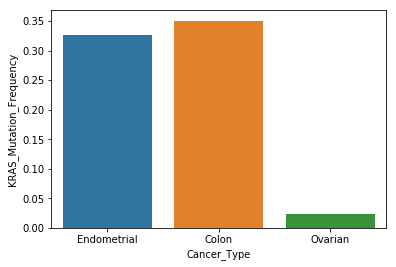

In [8]:
freq_plt = sns.barplot(data=plot_freq_df, x='Cancer_Type', y =gene+'_Mutation_Frequency')